## Read Me

There are no special requiremnts to run this in the colab envirnoment. I did receive some help from Microsoft Copilot.

## Question 1

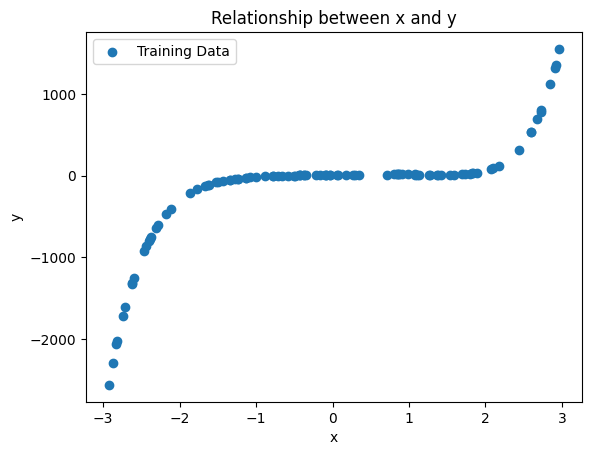

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# Plot the training data
plt.scatter(x_train, y_train, label='Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relationship between x and y')
plt.legend()
plt.show()


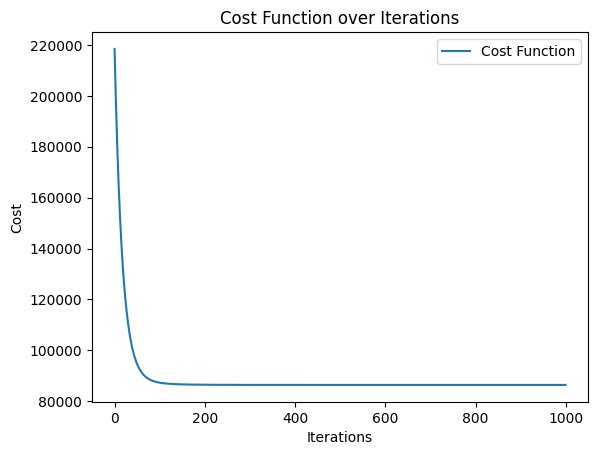

In [5]:
# Define the linear regression model
def predict(x, theta):
    return np.dot(x, theta)

# Define the cost function
def compute_cost(x, y, theta):
    m = len(y)
    predictions = predict(x, theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Define the gradient descent function
def gradient_descent(x, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        predictions = predict(x, theta)
        theta -= (learning_rate/m) * np.dot(x.T, (predictions - y))
        cost_history[i] = compute_cost(x, y, theta)

    return theta, cost_history

# Prepare the data for linear regression (adding a column of ones for the bias term)
x_train_bias = np.c_[np.ones((x_train.shape[0], 1)), x_train]
theta = np.zeros(x_train_bias.shape[1])

# Set the hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(x_train_bias, y_train, theta, learning_rate, num_iterations)

# Plot the cost function
plt.plot(range(num_iterations), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.legend()
plt.show()


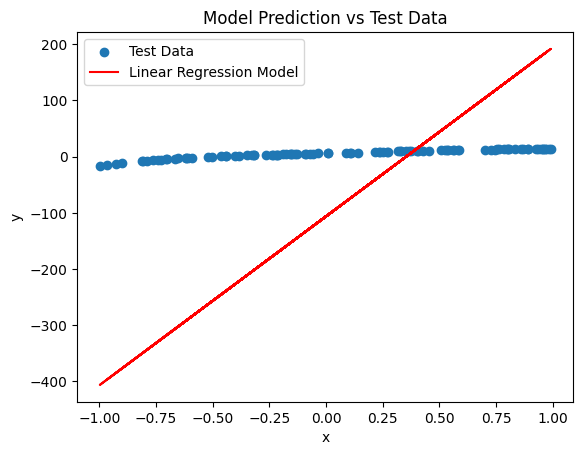

Mean Squared Error on test data: 35280.69551454475


In [6]:
# Prepare the test data (adding a column of ones for the bias term)
x_test_bias = np.c_[np.ones((x_test.shape[0], 1)), x_test]

# Make predictions on the test data
y_pred = predict(x_test_bias, theta)

# Plot the test data and the model's predictions
plt.scatter(x_test, y_test, label='Test Data')
plt.plot(x_test, y_pred, color='red', label='Linear Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Prediction vs Test Data')
plt.legend()
plt.show()

# Calculate the prediction error
error = y_test - y_pred
mse = np.mean(np.square(error))
print(f'Mean Squared Error on test data: {mse}')


The plot below shows the relationship between x_train and y_train:
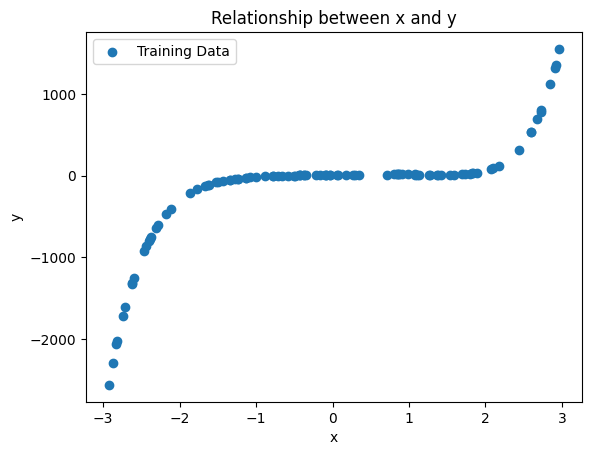

Upon visual inspection, it appears that the relationship between x and y is non-linear, indicating the need for feature engineering to add non-linearity.

The cost function plot shows the cost decreasing over the iterations of gradient descent, indicating that the algorithm is effectively minimizing the error between the predicted values and the actual values:
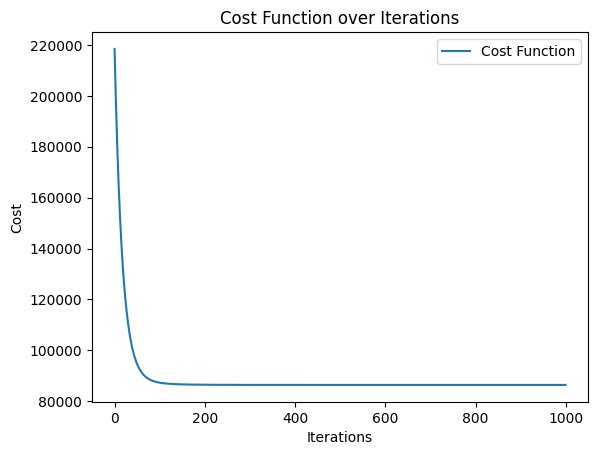

The plot below shows the comparison between the test data and the linear regression model's predictions:
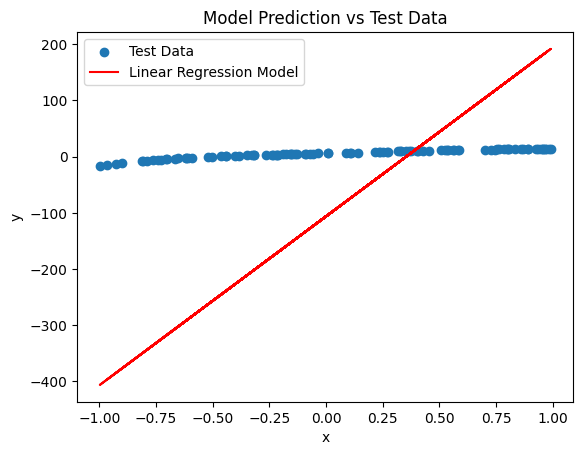

The model's predictions do not fit the test data well, highlighting potential issues with the model's accuracy.


The mean squared error (MSE) on the test data was calculated to evaluate the model's performance. Despite the model's ability to reduce the cost function during training, it did not accurately predict the test data, indicating the need for further improvements and possibly incorporating non-linear features.

## Question 2

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data from the Excel file
df = pd.read_excel('Housing_data_regression.xlsx')

# Separate the features and the target variable
X = df[['Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']].values
y = df['Price'].values

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Add a column of ones for the bias term
X_bias = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]
theta = np.zeros(X_bias.shape[1])

In [53]:
# Define the linear regression model
def predict(x, theta):
    return np.dot(x, theta)

# Define the cost function
def compute_cost(x, y, theta):
    m = len(y)
    predictions = predict(x, theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Define the gradient descent function
def gradient_descent(x, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        predictions = predict(x, theta)
        theta -= (learning_rate/m) * np.dot(x.T, (predictions - y))
        cost_history[i] = compute_cost(x, y, theta)

    return theta, cost_history

# Set the hyperparameters
learning_rate = 0.0001  # Further adjusted to a smaller learning rate
num_iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X_bias, y, theta, learning_rate, num_iterations)

# Calculate the average least squares error
predictions = predict(X_bias, theta)
average_lse = compute_cost(X_bias, y, theta) * 2  # Multiply by 2 to get the sum of squared errors
average_lse /= len(y)  # Divide by the number of data points to get the average
print(f'Average Least Squares Error: {average_lse}')

Average Least Squares Error: 6183454450.433882


In [54]:
# Identify the most and least significant features (excluding Bias term)
feature_names = ['Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
theta_features = theta[1:]  # Exclude the bias term
theta_with_features = list(zip(feature_names, theta_features))
theta_sorted = sorted(theta_with_features, key=lambda x: abs(x[1]), reverse=True)

most_significant_feature = theta_sorted[0][0]
least_significant_feature = theta_sorted[-1][0]

print(f'Most Significant Feature: {most_significant_feature}')
print(f'Least Significant Feature: {least_significant_feature}')

Most Significant Feature: Bathrooms
Least Significant Feature: # Garages


**Which factor has the most effect on the final value?**
Based on the linear regression model, the most significant feature is bathrooms, the one with the highest absolute value of the learned parameter (theta). I excluded the bias term and identified the feature with the largest influence.

**How do you know this?**
The most significant feature is determined by the absolute value of its corresponding parameter (theta). A higher absolute value indicates a greater impact on the target variable (price). This means changes in this feature have the most substantial effect on the predicted house prices.

**Can you use only
this feature to predict the price?**
Yes, you can use only the most significant feature to predict the price. However, using only one feature may result in a model that is less accurate than one using multiple features. To do so, you would need to train a new linear regression model using only this feature.

In [55]:
# Remove the least significant feature from the dataset
least_significant_index = feature_names.index(least_significant_feature)
X_reduced = np.delete(X_bias, least_significant_index, axis=1)

# Retrain the model
theta_reduced = np.zeros(X_reduced.shape[1])
theta_reduced, cost_history_reduced = gradient_descent(X_reduced, y, theta_reduced, learning_rate, num_iterations)

# Calculate the average least squares error for the reduced model
predictions_reduced = predict(X_reduced, theta_reduced)
average_lse_reduced = compute_cost(X_reduced, y, theta_reduced) * 2  # Multiply by 2 to get the sum of squared errors
average_lse_reduced /= len(y)  # Divide by the number of data points to get the average
print(f'Average Least Squares Error (Reduced Model): {average_lse_reduced}')

Average Least Squares Error (Reduced Model): 21770607802.067226


**Which factor has the least effect on the final value?** The least significant feature is # Garages, the one with the smallest absolute value of the learned parameter (theta).

**Which factor has the least effect on the final value?** The least significant feature is determined by the absolute value of its corresponding parameter (theta). A smaller absolute value indicates a lesser impact on the target variable (price). This means changes in this feature have the least substantial effect on the predicted house prices.

**What effect does removing this feature have on the performance?**

From the provided information:

Original Average Least Squares Error: 6,183,454,450.433882

Reduced Model Average Least Squares Error: 21,770,607,802.067226

Removing the least significant feature significantly increased the average LSE, indicating that even though this feature had the least effect individually, removing it still negatively impacted the overall model performance. This suggests that every feature contributes to the predictive power of the model, and removing any feature, even the least significant one, can degrade performance.